# Importando base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv('tips.csv')

In [6]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [7]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [8]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
}

In [9]:
type(dados)

pandas.core.frame.DataFrame

In [10]:
gorjetas = dados.rename(columns = renomear)

In [11]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [12]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [14]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [16]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [17]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [18]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [19]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [20]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

In [21]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [22]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [24]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [25]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [27]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [28]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando o Seaborn

In [30]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import seaborn as sns

In [32]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, matplotlib, numpy, pandas
Required-by: missingno


# Análise 1 - Valor da Conta e Gorjeta

In [33]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

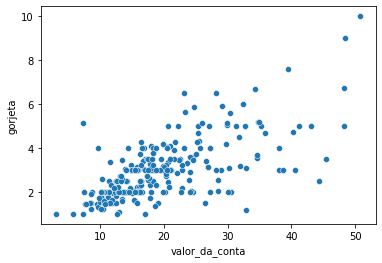

In [35]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [39]:
print(f'A base de dados contém {gorjetas.shape[0]} registros\n')
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [40]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [43]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [44]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,procentagem,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447,0.059447


In [45]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [47]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,procentagem,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587,0.17


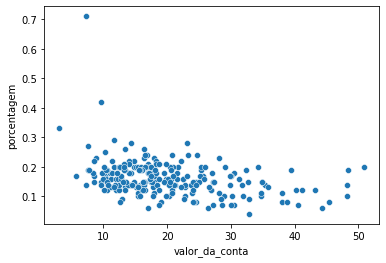

In [77]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

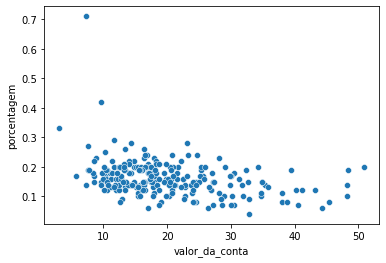

In [65]:
# quando for chamar a variável que possui o gráfico passar .get_figure()
porcentagem_conta.get_figure()

In [78]:
porcentagem_conta.figure.suptitle('Valor da conta X Porcentagem')

Text(0.5, 0.98, 'Valor da conta X Porcentagem')

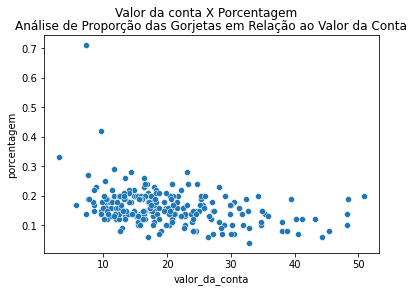

In [70]:
# Adicionando subtítulo
porcentagem_conta = porcentagem_conta.figure.suptitle('Valor da conta X Porcentagem')
porcentagem_conta.get_figure()

In [82]:
# para adicionar título ao gráfico (tem anomalias se usado junto com o suptitle)
# porcentagem_conta.set_title('Análise de Proporção das Gorjetas em Relação ao Valor da Conta')

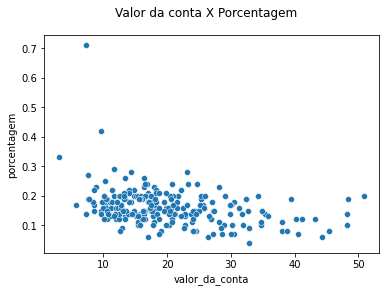

In [79]:
porcentagem_conta.get_figure()

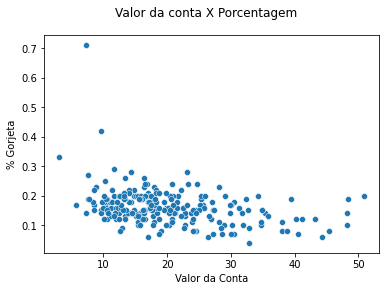

In [81]:
# alterando labels dos eixo x e y
porcentagem_conta.set(xlabel='Valor da Conta', ylabel='% Gorjeta')
porcentagem_conta.get_figure()

In [83]:
# para salvar o gráfico em png
imagem = porcentagem_conta.get_figure()
imagem.savefig('imagem.png')

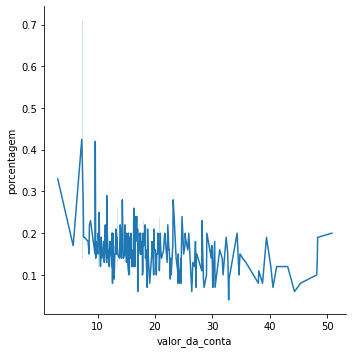

In [50]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

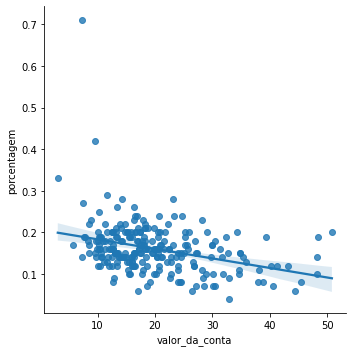

In [51]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [84]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,procentagem,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808,0.15


In [87]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,procentagem,porcentagem
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163196,0.163226
std,9.832154,1.401468,0.810751,0.085119,0.085060
min,3.070000,1.000000,1.000000,0.035638,0.040000
25%,13.420000,2.000000,2.000000,0.106771,0.110000
50%,17.920000,3.000000,2.000000,0.153846,0.150000
75%,26.860000,3.680000,3.000000,0.195059,0.200000
max,50.810000,10.000000,5.000000,0.710345,0.710000


In [88]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,procentagem,porcentagem
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159328,0.159536
std,8.255582,1.377190,1.017984,0.039910,0.039889
min,7.250000,1.000000,1.000000,0.056797,0.060000
25%,13.325000,2.000000,2.000000,0.136906,0.140000
50%,17.590000,2.740000,2.000000,0.155625,0.160000
75%,22.755000,3.505000,3.000000,0.185014,0.185000
max,48.330000,9.000000,6.000000,0.291990,0.290000


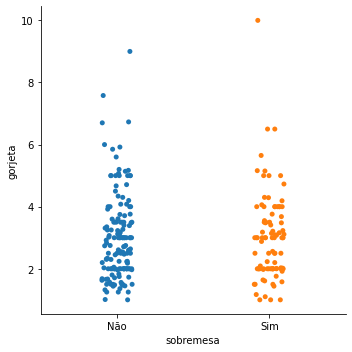

In [89]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

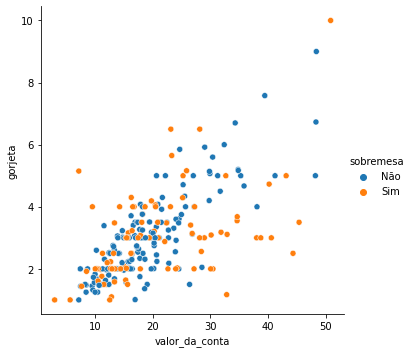

In [90]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

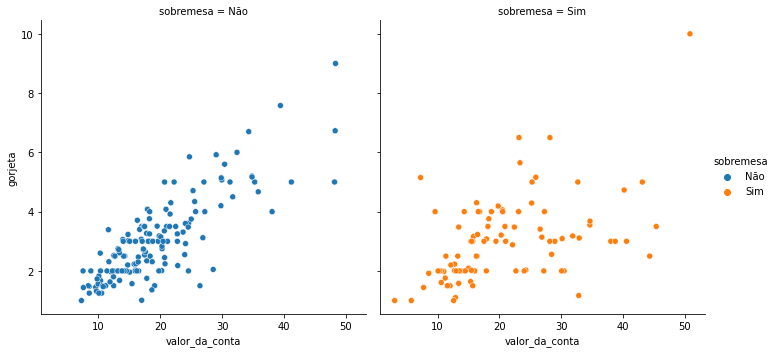

In [92]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

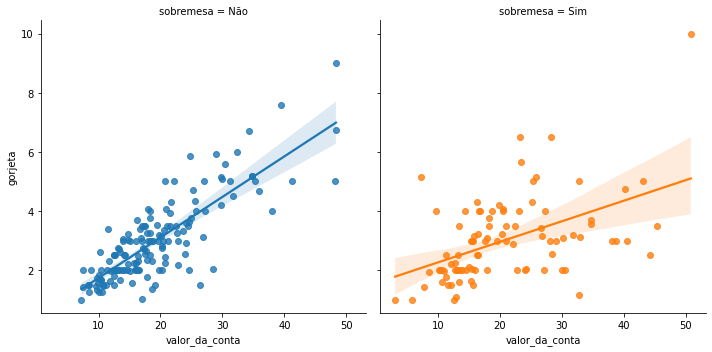

In [93]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

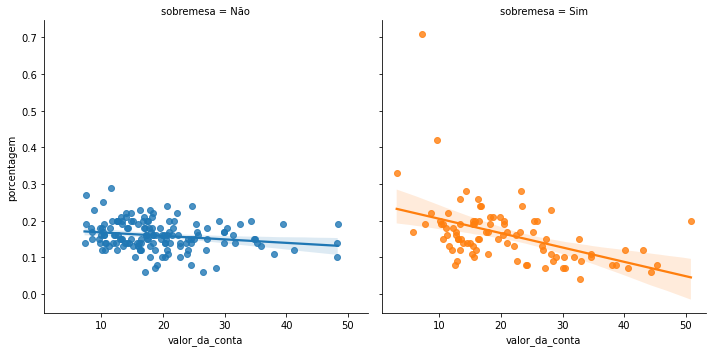

In [94]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

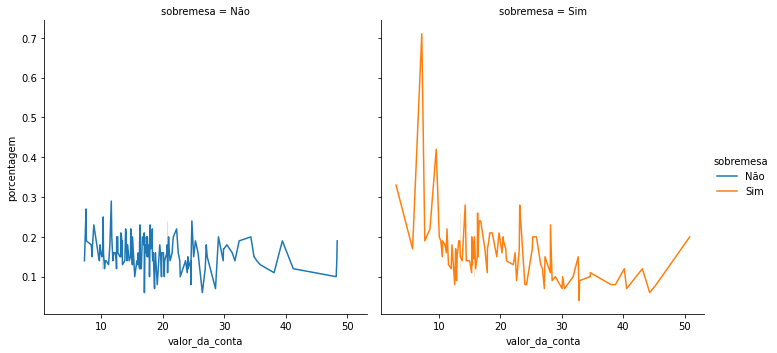

In [96]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta entre os que pediram sobremesa e não pediram sobremesa**

## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [97]:
from scipy.stats import ranksums

In [99]:
sobremesa = gorjetas.query("sobremesa=='Sim'").porcentagem

In [100]:
sem_sobremesa = gorjetas.query("sobremesa=='Não'").porcentagem

In [103]:
r = ranksums(sobremesa, sem_sobremesa)

In [106]:
# para aceitarmos a hipótese alternativa o p-value deve ser <= 0.05
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.